<h1><center>Lung Cancer Detection from CT scans</center></h1>

<p>In this notebook, we will predict whether a given image falls under benign, malignant or normal case from CT scans in The IQ-OTHNCCD lung cancer dataset. We will employ a Convolutional Neural Network to classify the images into one of the three classes. The dataset contains a total of 1190 images representing CT scan slices of 110 cases. These cases are grouped into three classes: normal, benign, and malignant.Out of these, 40 cases are diagnosed as malignant; 15 cases diagnosed with benign; and 55 cases classified as normal cases.</p>

### Importing the dataset

In [1]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip"
!unzip -qo Lung_cancer_dataset.zip
!rm Lung_cancer_dataset.zip

--2021-07-14 14:07:25--  https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.64.32
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.64.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156629884 (149M) [application/x-zip-compressed]
Saving to: ‘Lung_cancer_dataset.zip’

Lung_cancer_dataset 100%[===================>] 149.37M  57.5MB/s    in 2.6s    

2021-07-14 14:07:27 (57.5 MB/s) - ‘Lung_cancer_dataset.zip’ saved [156629884/156629884]



In [2]:
#Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D, BatchNormalization
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Visualizing the dataset

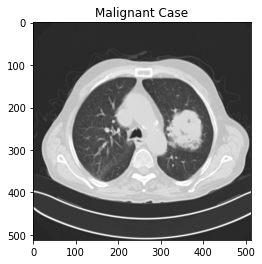

In [3]:
img = cv2.imread("Lung_cancer_dataset/Train/Malignant cases/Malignant case (10).jpg")
plt.title("Malignant Case")
plt.imshow(img)

In [4]:
img_width = 64
img_height = 64

<h2>Preparing the data</h2>

<p>We have used ImageDataGenerator from keras, in the subsequent cells, to fetch the images along with their labels to train the neural network</p>

In [5]:
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.1)

In [6]:
train_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train", target_size = (img_width, img_height), color_mode="grayscale", class_mode="categorical", batch_size = 16, subset = "training", shuffle="True")

Found 970 images belonging to 3 classes.


In [7]:
validation_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train", target_size = (img_width, img_height),color_mode="grayscale", class_mode="categorical", batch_size = 16,subset = "validation")

Found 107 images belonging to 3 classes.


# The labels
<p>We will use one hot encoding here as our data is categorical in nature</p>

In [8]:
train_data_generator.next()[1]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

<h2> The Model </h2>

In [97]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D(3,3))

model.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
#model.add(Dropout(0.3))
model.add(Dense(32,activation="relu"))
#model.add(Dropout(0.4))

model.add(Dense(3, activation="softmax"))

In [98]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 9, 9, 32)          18464     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)              

In [99]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [100]:
my_callback = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 7, restore_best_weights = True)]

In [101]:
history=model.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=50, validation_data=validation_data_generator, validation_steps = len(validation_data_generator), callbacks=my_callback)

Epoch 1/50
61/61 [==============================] - 5s 87ms/step - loss: 0.9754 - accuracy: 0.5103 - val_loss: 0.9601 - val_accuracy: 0.5140
Epoch 2/50
61/61 [==============================] - 5s 85ms/step - loss: 0.9265 - accuracy: 0.5412 - val_loss: 0.9311 - val_accuracy: 0.5327
Epoch 3/50
61/61 [==============================] - 5s 85ms/step - loss: 0.7901 - accuracy: 0.6454 - val_loss: 1.0730 - val_accuracy: 0.4019
Epoch 4/50
61/61 [==============================] - 5s 85ms/step - loss: 0.6421 - accuracy: 0.7505 - val_loss: 1.1668 - val_accuracy: 0.4953
Epoch 5/50
61/61 [==============================] - 5s 84ms/step - loss: 0.4475 - accuracy: 0.8340 - val_loss: 1.0685 - val_accuracy: 0.5140
Epoch 6/50
61/61 [==============================] - 5s 85ms/step - loss: 0.3271 - accuracy: 0.8691 - val_loss: 0.8691 - val_accuracy: 0.6168
Epoch 7/50
61/61 [==============================] - 5s 84ms/step - loss: 0.2628 - accuracy: 0.8907 - val_loss: 0.9214 - val_accuracy: 0.6449
Epoch 8/50
61

### Preparing Test Data for prediction

In [102]:
datagen_test = ImageDataGenerator(rescale = 1/255.0)
test_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Test", target_size = (img_width, img_height), color_mode="grayscale", class_mode="categorical", batch_size = 10, subset = "training")

Found 20 images belonging to 3 classes.


In [104]:
test_data_generator.next()[1]

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# Model accuracy and loss trends

Lets visualize the accuracy and loss trends throughout the training process

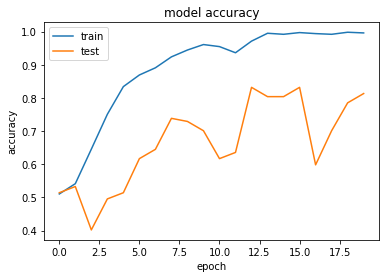

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

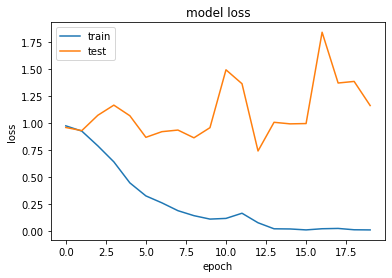

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Visualizing the predictions of the model on unseen data

In [107]:
x,y = test_data_generator.next()
pred_array=[]
max_index_arr = []
for i in range(5):
    img = x[i]
    img = img.reshape(-1,64,64,1)
    pred_val = model.predict(img)
    max_idx = np.argmax(pred_val)
    pred_array.append(max_idx)

In [108]:
#Making the Output meaningful using named classes

cell_dict = {0:"Benign", 1:"Malignant", 2:"Normal"}
predictions = {}
actual_val = {}

k=0
for arr in y[:5]:
    actual_val[k] = cell_dict[np.argmax(arr)]
    k+=1

k=0
for pred in pred_array:
    predictions[k] = cell_dict[pred]
    k+=1
    
print("ACTUAL:", actual_val)
print("PREDICTIONS:", predictions)

ACTUAL: {0: 'Malignant', 1: 'Malignant', 2: 'Benign', 3: 'Benign', 4: 'Normal'}
PREDICTIONS: {0: 'Malignant', 1: 'Malignant', 2: 'Benign', 3: 'Benign', 4: 'Normal'}


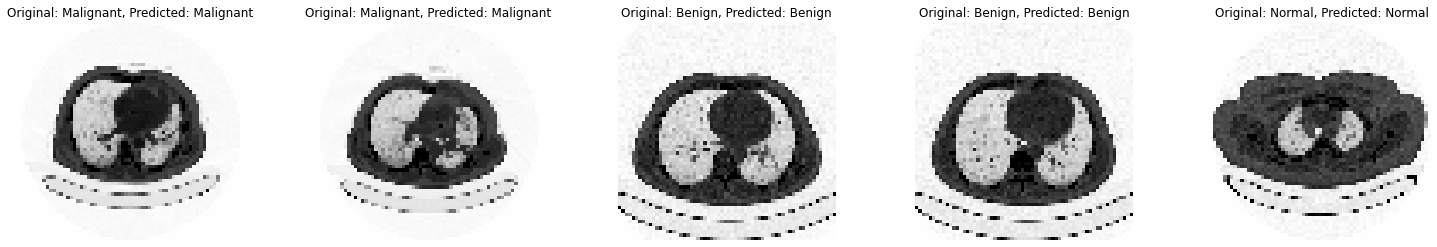

In [109]:
plt.figure(figsize = (20,20))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(x[i], cmap="binary")
    plt.title('Original: {}, Predicted: {}'.format(actual_val[i], predictions[i]))
    plt.axis('Off')

plt.subplots_adjust(left=1.5, right=2.5, top=1)
plt.show()

In [110]:
model.save("lung_cancer_prediction.h5")